In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [3]:
ipl = pd.read_csv("D:\Study\Practical\CodeUnnati\Project\ipl_data.csv")
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


Data Pre-Processing

In [4]:
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [5]:
X = df.drop(['total'], axis =1)
y = df['total']

Data Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Define Neural Network

In [9]:
model = keras.Sequential([
	keras.layers.Input( shape=(X_train_scaled.shape[1],)),
	keras.layers.Dense(512, activation='relu'), 
	keras.layers.Dense(216, activation='relu'), 
	keras.layers.Dense(1, activation='linear') 
])


huber_loss = tf.keras.losses.Huber(delta=1.0) 
model.compile(optimizer='adam', loss=huber_loss) 

Model Training

In [10]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50

832/832 [==============================] - 4s 4ms/step - loss: 32.5557 - val_loss: 22.0766
Epoch 2/50
832/832 [==============================] - 3s 4ms/step - loss: 22.3796 - val_loss: 22.1055
Epoch 3/50
832/832 [==============================] - 4s 4ms/step - loss: 22.3227 - val_loss: 22.3160
Epoch 4/50
832/832 [==============================] - 3s 4ms/step - loss: 22.2265 - val_loss: 22.2254
Epoch 5/50
832/832 [==============================] - 2s 3ms/step - loss: 22.1751 - val_loss: 21.8964
Epoch 6/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1446 - val_loss: 21.8972
Epoch 7/50
832/832 [==============================] - 2s 3ms/step - loss: 22.1380 - val_loss: 21.8426
Epoch 8/50
832/832 [==============================] - 2s 3ms/step - loss: 22.0917 - val_loss: 21.8387
Epoch 9/50
832/832 [==============================] - 2s 3ms/step - loss: 22.1351 - val_loss: 21.7923
Epoch 10/50
832/832 [==============================] - 2s 3ms/step - loss: 22.124

<Axes: >

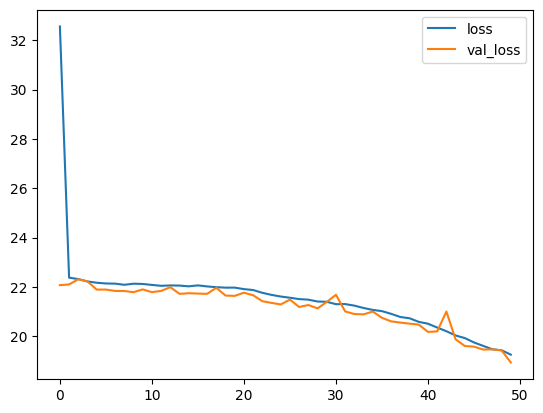

In [12]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

Model Evaluation

In [13]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 [==============================] - 1s 1ms/step


19.432705303410433

Creating Widget

In [14]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output() 
		

		
		decoded_venue = venue_encoder.transform([venue.value])
		decoded_batting_team = batting_team_encoder.transform([batting_team.value])
		decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
		decoded_striker = striker_encoder.transform([striker.value])
		decoded_bowler = bowler_encoder.transform([bowler.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
		input = input.reshape(1,5)
		input = scaler.transform(input)
		
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print(predicted_score)


In [24]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()